In [ ]:

%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
import math
from sklearn.model_selection import train_test_split
from datetime import datetime
from notebooks.manifold_reg.util import *
from notebooks.manifold_reg.custom_model import *

In [ ]:
train_df_bin = pd.read_csv("data/Li2008/beta1_train_sim_bin.csv")
test_df_bin = pd.read_csv("data/Li2008/beta1_test_sim_bin.csv")

X_train_bin, y_train_bin = train_df_bin[train_df_bin.columns.difference(["out"])].to_numpy(), train_df_bin["out"].to_numpy()
X_test_bin, y_test_bin = test_df_bin[test_df_bin.columns.difference(["out"])].to_numpy(), test_df_bin["out"].to_numpy()

In [ ]:
X_99, beta_99, y_99 = generate_data_v2(9, 10, tf_on=2, val_tf=[5, 5], n=200)

X_train_99, X_test_99, y_train_99, y_test_99 = train_test_split(X_99, y_99, test_size=0.5)

In [ ]:
from notebooks.manifold_reg.util import get_col_names
train_99 = np.concatenate([y_train_99.reshape(-1, 1), X_train_99], axis=1)
test_99 = np.concatenate([y_test_99.reshape(-1, 1), X_test_99], axis=1)
cols = get_col_names(9, 10)
train_99_df = pd.DataFrame(train_99, columns=cols)
test_99_df = pd.DataFrame(test_99, columns=cols)

In [ ]:
train_99_df.to_csv("data/Li2008/beta1_train_99_sim.csv", index=False)
test_99_df.to_csv("data/Li2008/beta1_test_99_sim.csv", index=False)

In [ ]:
train_99_bin = binarize_with_median(train_99).astype(np.int_)
test_99_bin = binarize_with_median(test_99).astype(np.int_)
train_99_bin_df = pd.DataFrame(train_99_bin, columns=cols)
test_99_bin_df = pd.DataFrame(test_99_bin, columns=cols)

In [ ]:
train_99_bin_df.to_csv("data/Li2008/beta1_train_99_sim_bin.csv", index=False)
test_99_bin_df.to_csv("data/Li2008/beta1_test_99_sim_bin.csv", index=False)

In [ ]:
assoc_mat_2 = get_assoc_mat(9, 10)
np.save("data/Li2008/assoc_mat_99.npy", assoc_mat_2)

In [ ]:
assoc_mat_2

In [296]:
from notebooks.manifold_reg.util import compare_kernels
gammas = np.logspace(-2, 3, 30)
res_2 = compare_kernels(gammas, X_train_99, X_test_99, y_train_99, y_test_99, assoc_mat_2)

Done
Best gamma
Linear Regression: Validation - gamma: 41.753189365604044, score: 55.896676851217954,  Test - gamma: 137.3823795883264, score: 55.82035621401853
Binary Logistic Regression: Validation - gamma: 18.873918221350976, score: 0.5850653719878723  Test - gamma: 92.36708571873865, score: 0.5357009676719974
Contin Logistic Regression: Validation - gamma: 28.072162039411786, score: 0.4975197026389129  Test - gamma: 92.36708571873865, score: 0.4220796684191055


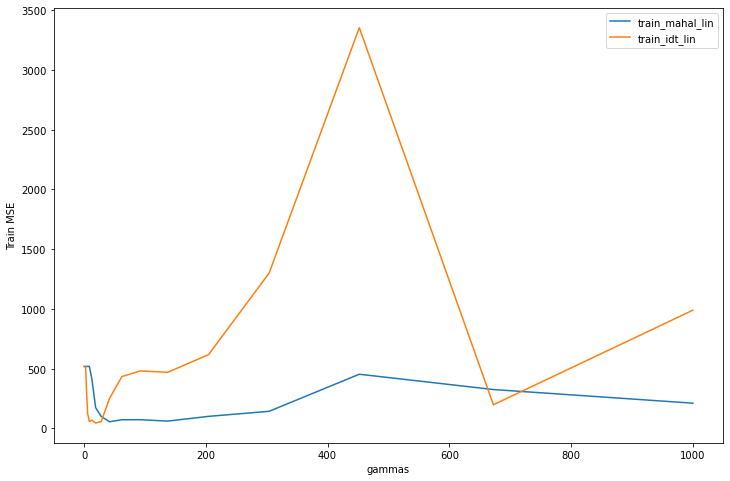

In [297]:
plot_ker_comp(gammas, res_2, "train_mahal_lin", "train_idt_lin", "gammas", "Train MSE")

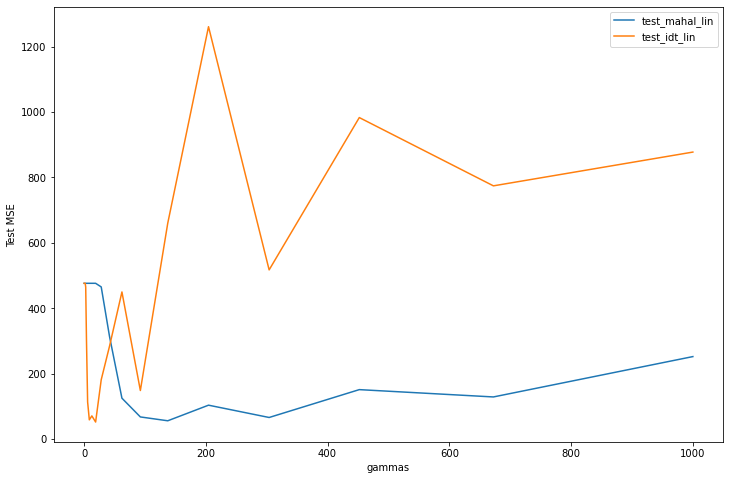

In [298]:
plot_ker_comp(gammas, res_2, "test_mahal_lin", "test_idt_lin", "gammas", "Test MSE")

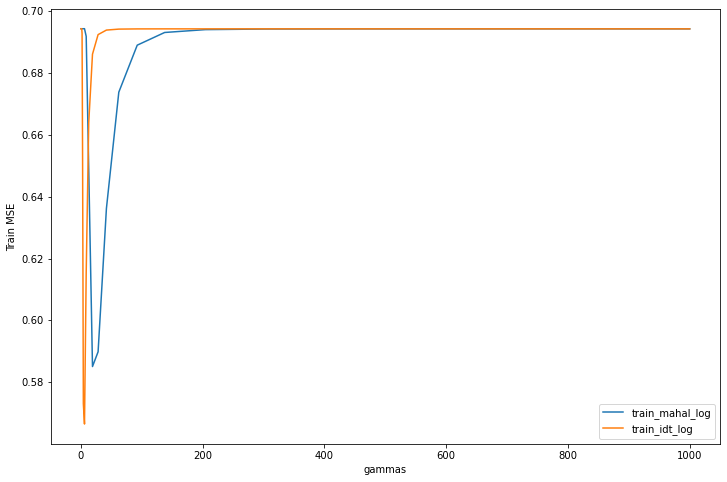

In [299]:
plot_ker_comp(gammas, res_2, "train_mahal_log", "train_idt_log", "gammas", "Train MSE")

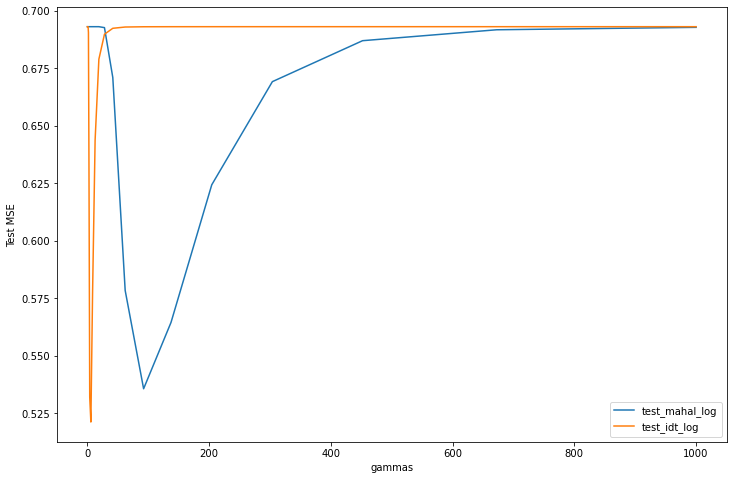

In [300]:
plot_ker_comp(gammas, res_2, "test_mahal_log", "test_idt_log", "gammas", "Test MSE")

In [ ]:
from notebooks.manifold_reg.eval_moses_models import score_moses_models

fold_score_gamma_92 = score_moses_models("data/exps4/gamma_92_a_1_c100", [42], ensemble=True)
print(fold_score_gamma_92["log_loss"].mean())
fold_score_gamma_92

In [ ]:

fold_score_gamma_92_2 = score_moses_models("data/exps4/gamma_92_a_0.1_c100", [42], ensemble=True)
print(fold_score_gamma_92_2["log_loss"].mean())
fold_score_gamma_92_2

In [ ]:
fold_score_no_pen = score_moses_models("data/exps4/no_pen", [42], ensemble=True)
print(fold_score_no_pen["log_loss"].mean())
fold_score_no_pen

In [ ]:
fold_score_gamma_12 = score_moses_models("data/exps4/gamma_12_a_1_c100", [42], ensemble=True)

print(fold_score_gamma_12["log_loss"].mean())
fold_score_gamma_12

In [ ]:
fold_score_gamma_92 = score_moses_models("data/exps4/gamma_92_a_1_c100", [42],
                        test="data/Li2008/beta1_test_99_sim_bin.csv", combo_file="data/exps4/gamma_92_a_1_c100/seed_42/combo_s_42_f_0.txt" ,ensemble=True)

fold_score_gamma_92

In [ ]:
from notebooks.manifold_reg.eval_moses_models import score_moses_models
fold_score_gamma_no_eval = score_moses_models("data/exps4/gamma_92_no_eval", [42],
                        test="data/Li2008/beta1_test_99_sim_bin.csv", combo_file="data/exps4/gamma_92_no_eval/seed_42/combo_s_42_f_0.txt" ,ensemble=False)

fold_score_gamma_no_eval

In [ ]:
fold_score_no_pen_fs = score_moses_models("data/exps4/no_pen_fs", [42], ensemble=True)
print(fold_score_no_pen_fs["log_loss"].mean())
fold_score_no_pen_fs

In [ ]:
score_no_pen_fs = score_moses_models("data/exps4/no_pen_fs_train", [42],
                                     test="data/Li2008/beta1_test_99_sim_bin.csv",
                                     combo_file="data/exps4/no_pen_fs_train/seed_42/combo_s_42_f_0.txt", ensemble=True)
score_no_pen_fs

In [ ]:
fold_score_gamma_12_fs = score_moses_models("data/exps4/gamma_12_a_1_c100_fs", [42], ensemble=False)

print(fold_score_gamma_12_fs["log_loss"].mean())
fold_score_gamma_12_fs

In [ ]:
fold_score_gamma_92_fs = score_moses_models("data/exps4/gamma_92_a_1_c100_fs", [42],
                        test="data/Li2008/beta1_test_99_sim_bin.csv", combo_file="data/exps4/gamma_92_a_1_c100_fs/seed_42/combo_s_42_f_0.txt" ,ensemble=True)

fold_score_gamma_92_fs

In [302]:
np.save("data/Li2008/assoc_mat_165.npy" ,get_assoc_mat(15, 10))